In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
data = pd.read_csv("Company_Data.csv")
data.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [19]:
print(data.shape)
print(data.describe())

(400, 11)
            Sales   CompPrice      Income  ...       Price         Age   Education
count  400.000000  400.000000  400.000000  ...  400.000000  400.000000  400.000000
mean     7.496325  124.975000   68.657500  ...  115.795000   53.322500   13.900000
std      2.824115   15.334512   27.986037  ...   23.676664   16.200297    2.620528
min      0.000000   77.000000   21.000000  ...   24.000000   25.000000   10.000000
25%      5.390000  115.000000   42.750000  ...  100.000000   39.750000   12.000000
50%      7.490000  125.000000   69.000000  ...  117.000000   54.500000   14.000000
75%      9.320000  135.000000   91.000000  ...  131.000000   66.000000   16.000000
max     16.270000  175.000000  120.000000  ...  191.000000   80.000000   18.000000

[8 rows x 8 columns]


In [20]:
data['status'] = data['Sales'].apply(lambda Sales: 'Low' if Sales <= 7.5 else 'High')

In [21]:
data.drop(['Sales'],inplace=True,axis=1)

In [22]:
data.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
status         object
dtype: object

In [23]:
for i in data.columns:
  encoder = LabelEncoder()
  if data[i].dtypes == object:
    data[i] = encoder.fit_transform(data[i])
  else:
    pass

In [24]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,status
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [ ]:
# distribution of Amount
amount = [data['Amount'].values]
sns.distplot(amount)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

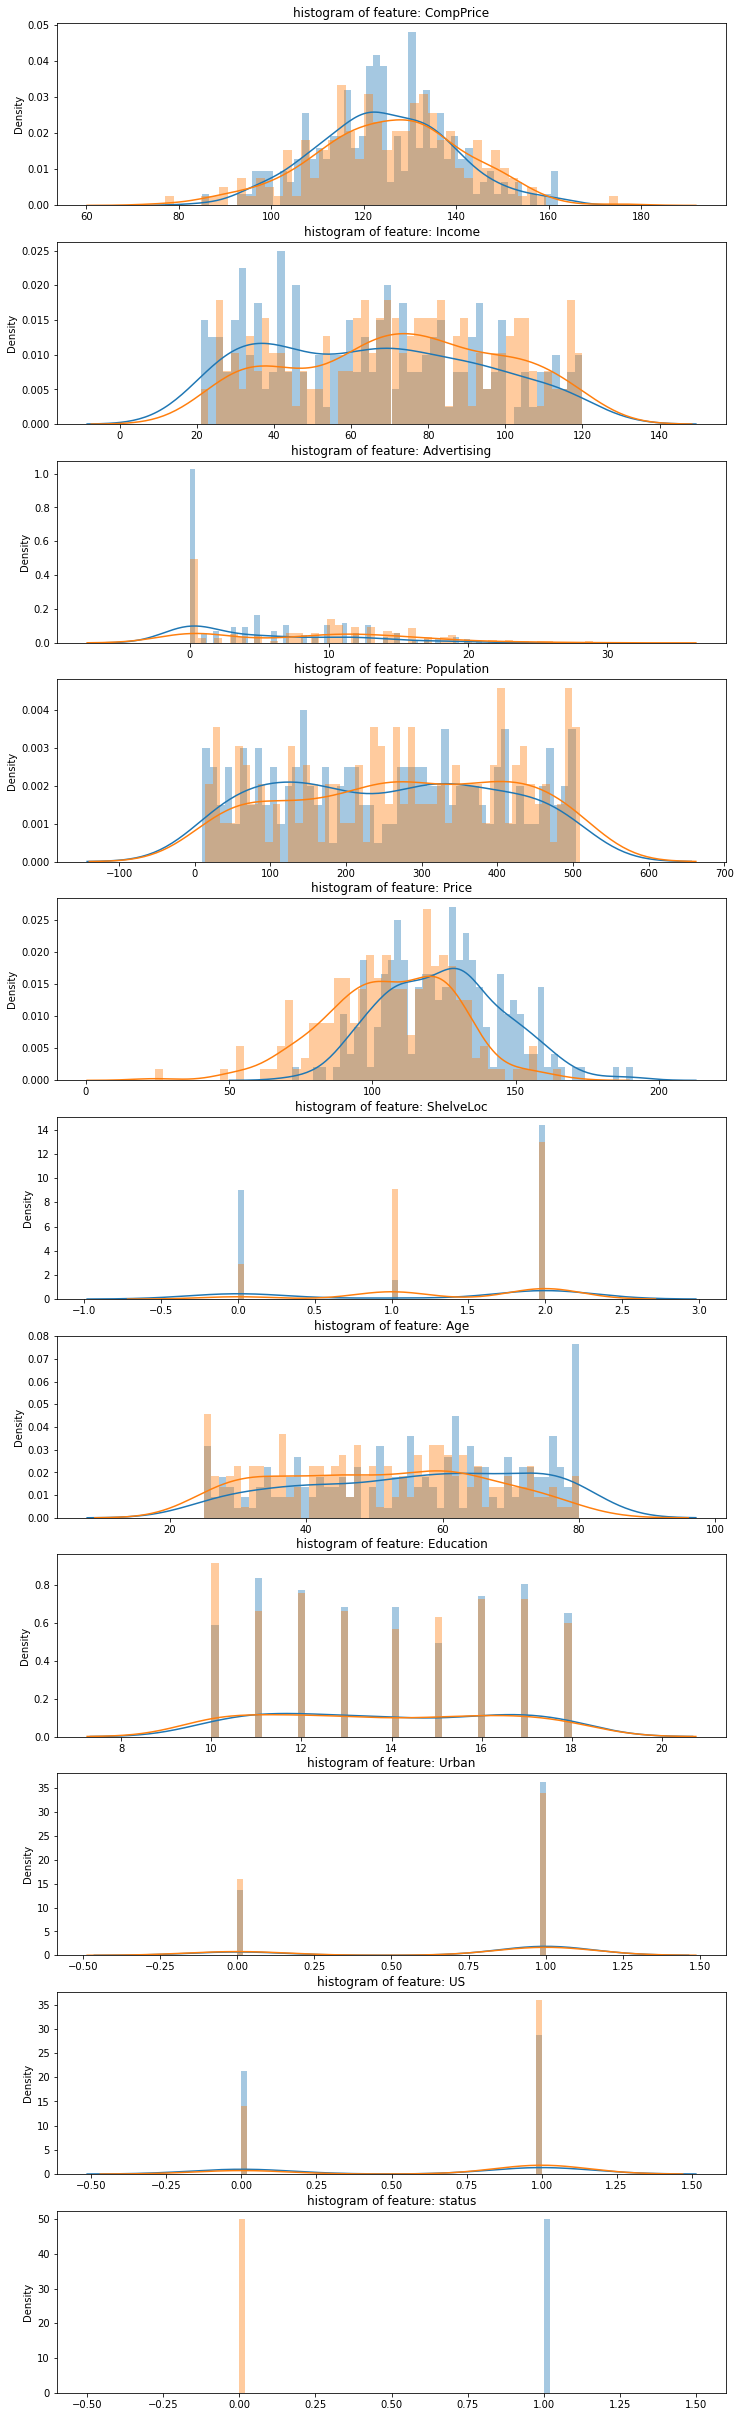

In [25]:
from matplotlib import gridspec
# distribution of anomalous features
features = data.iloc[:,0:11].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[c][data.status == 1], bins=50)
    sns.distplot(data[c][data.status == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

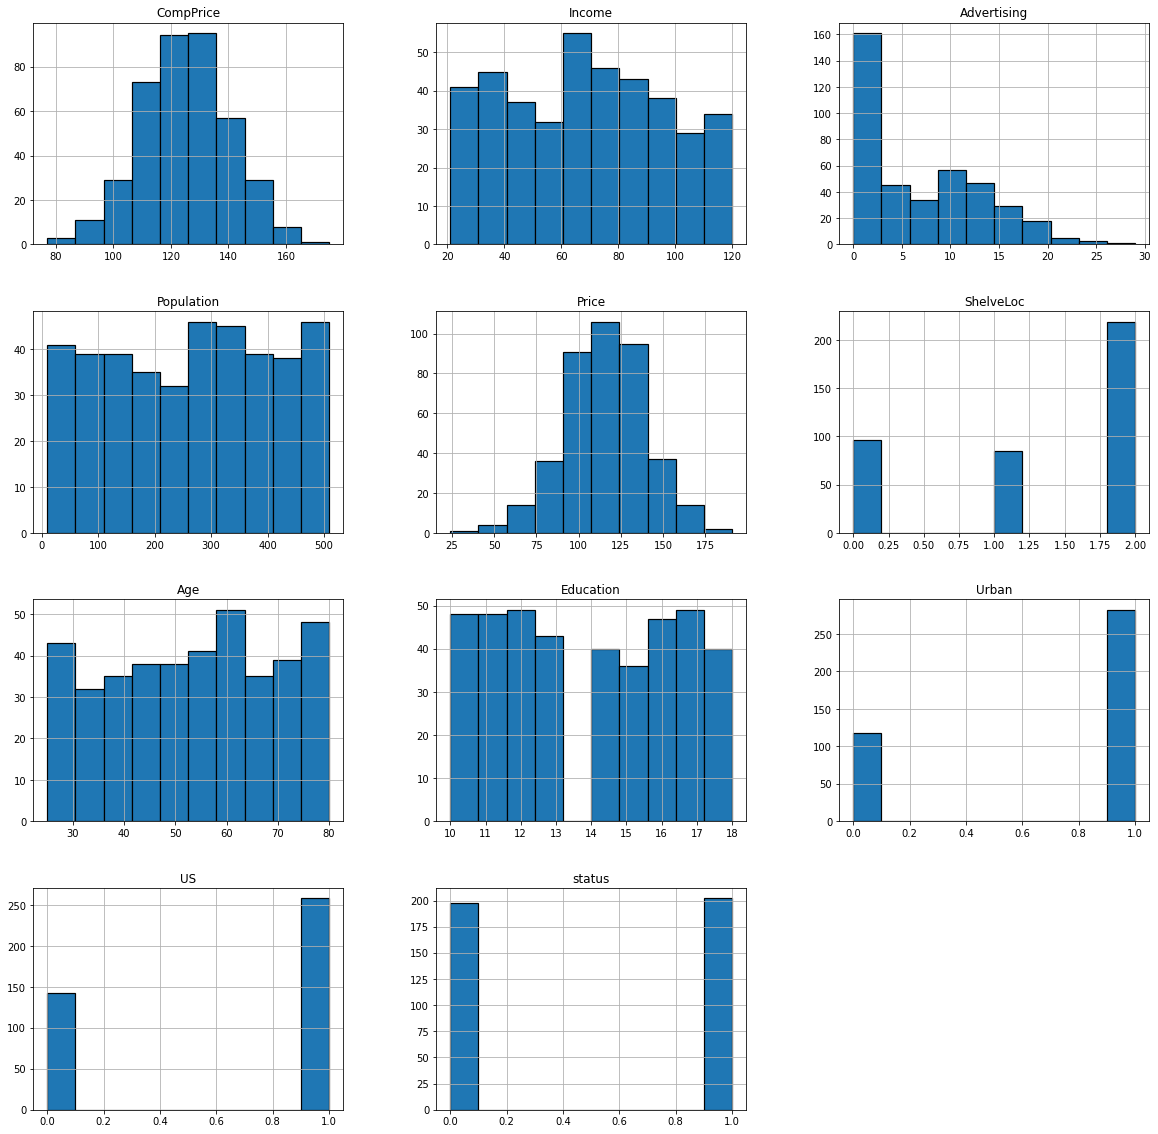

In [52]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [27]:
X = data.iloc[:,0:10]
y = data.iloc[:,10]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
Rfc = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=Rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

best parameter for random forest is

In [33]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [35]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=8, criterion='gini')


In [37]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [49]:
pred=rfc1.predict(X_test)


In [41]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.7916666666666666


In [47]:
confusion_matrix(y_test, pred)

array([[51, 14],
       [11, 44]])

In [48]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        65
           1       0.76      0.80      0.78        55

    accuracy                           0.79       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.79      0.79      0.79       120



With the Random Forest Model, we have:

51 transactions classified as high and were actually high ;

14 transactions classified as Fraud but that were really  sale (type 1 error);

11 transactions classified as high but which were low sales value(type 2 error);

44 transactions classified as low and were actually high sale.

